<a href="https://colab.research.google.com/github/Talha1818/Building-Agentic-AI-Using-LangGraph/blob/master/Building_Agentic_AI_Using_LangGraph.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **LangGraph**
  * ### LangGraph is a library for building stateful, multi-actor applications with LLMs, used to create agent and multi-agent workflows. Compared to other LLM frameworks, it offers these core benefits: cycles, controllability, and persistence. LangGraph allows you to define flows that involve cycles, essential for most agentic architectures, differentiating it from DAG-based solutions. As a very low-level framework, it provides fine-grained control over both the flow and state of your application, crucial for creating reliable agents. Additionally, LangGraph includes built-in persistence, enabling advanced human-in-the-loop and memory features.

In [33]:
!pip install -qU langgraph langchain langchain_community langchainhub langchain_groq wikipedia

In [ ]:
from langgraph.graph import Graph

In [ ]:
from langchain_groq import ChatGroq

In [15]:
import requests
import os
from google.colab import userdata

api_key = userdata.get('GROQ_API_KEY')
url = "https://api.groq.com/openai/v1/models"

headers = {
    "Authorization": f"Bearer {api_key}",
    "Content-Type": "application/json"
}

response = requests.get(url, headers=headers)

print(response.json())

{'object': 'list', 'data': [{'id': 'whisper-large-v3-turbo', 'object': 'model', 'created': 1728413088, 'owned_by': 'OpenAI', 'active': True, 'context_window': 448, 'public_apps': None}, {'id': 'llama-3.1-70b-versatile', 'object': 'model', 'created': 1693721698, 'owned_by': 'Meta', 'active': True, 'context_window': 32768, 'public_apps': None}, {'id': 'llama3-groq-8b-8192-tool-use-preview', 'object': 'model', 'created': 1693721698, 'owned_by': 'Groq', 'active': True, 'context_window': 8192, 'public_apps': None}, {'id': 'llama3-groq-70b-8192-tool-use-preview', 'object': 'model', 'created': 1693721698, 'owned_by': 'Groq', 'active': True, 'context_window': 8192, 'public_apps': None}, {'id': 'llama-3.2-90b-vision-preview', 'object': 'model', 'created': 1727226914, 'owned_by': 'Meta', 'active': True, 'context_window': 8192, 'public_apps': None}, {'id': 'llama-3.1-8b-instant', 'object': 'model', 'created': 1693721698, 'owned_by': 'Meta', 'active': True, 'context_window': 131072, 'public_apps':

In [17]:
import pandas as pd

df = pd.DataFrame(response.json()['data'])
df

,id,object,created,owned_by,active,context_window,public_apps
0,whisper-large-v3-turbo,model,1728413088,OpenAI,True,448,None
1,llama-3.1-70b-versatile,model,1693721698,Meta,True,32768,None
2,llama3-groq-8b-8192-tool-use-preview,model,1693721698,Groq,True,8192,None
3,llama3-groq-70b-8192-tool-use-preview,model,1693721698,Groq,True,8192,None
4,llama-3.2-90b-vision-preview,model,1727226914,Meta,True,8192,None
5,llama-3.1-8b-instant,model,1693721698,Meta,True,131072,None
6,llama-guard-3-8b,model,1693721698,Meta,True,8192,None
7,llama-3.3-70b-versatile,model,1733447754,Meta,True,32768,None
8,llama-3.3-70b-specdec,model,1733505017,Meta,True,8192,None
9,whisper-large-v3,model,1693721698,OpenAI,True,448,None


In [20]:
llm = ChatGroq(model="llama3-70b-8192", api_key=api_key)
llm

ChatGroq(client=<groq.resources.chat.completions.Completions object at 0x7ea9982ba290>, async_client=<groq.resources.chat.completions.AsyncCompletions object at 0x7ea9982b8340>, model_name='llama3-70b-8192', model_kwargs={}, groq_api_key=SecretStr('**********'))

In [25]:
res = llm.invoke("What is the capital of Pakistan?")
res

AIMessage(content='The capital of Pakistan is Islamabad.', additional_kwargs={}, response_metadata={'token_usage': {'completion_tokens': 8, 'prompt_tokens': 17, 'total_tokens': 25, 'completion_time': 0.024635884, 'prompt_time': 0.003609355, 'queue_time': 0.016652192000000003, 'total_time': 0.028245239}, 'model_name': 'llama3-70b-8192', 'system_fingerprint': 'fp_2f30b0b571', 'finish_reason': 'stop', 'logprobs': None}, id='run-3d29c368-0bc2-4609-ba96-4299739bc664-0', usage_metadata={'input_tokens': 17, 'output_tokens': 8, 'total_tokens': 25})

In [26]:
res.content

'The capital of Pakistan is Islamabad.'

In [27]:
def llm_response(query):
  llm = ChatGroq(model="llama3-70b-8192", api_key=api_key)
  return llm.invoke(query).content

In [29]:
llm_response("Who is the Prime Minister of Pakistan?")

'As of my knowledge cutoff in December 2022, the Prime Minister of Pakistan is Shehbaz Sharif. However, please note that the political landscape in Pakistan can be dynamic, and there may have been changes since my knowledge cutoff. I would recommend checking with a reliable news source or official government website for the most up-to-date information on the current Prime Minister of Pakistan.'

### https://python.langchain.com/docs/integrations/tools/

In [30]:
from langchain.agents import AgentType, initialize_agent, load_tools

In [64]:
from langchain.agents import get_all_tool_names

# List all available tools
all_tool_names = get_all_tool_names()
print("Available Tools:")
for tool_name in all_tool_names:
    print(tool_name)


Available Tools:
sleep
wolfram-alpha
google-search
google-search-results-json
searx-search-results-json
bing-search
metaphor-search
ddg-search
google-books
google-lens
google-serper
google-scholar
google-finance
google-trends
google-jobs
google-serper-results-json
searchapi
searchapi-results-json
serpapi
dalle-image-generator
twilio
searx-search
merriam-webster
wikipedia
arxiv
golden-query
pubmed
human
awslambda
stackexchange
sceneXplain
graphql
openweathermap-api
dataforseo-api-search
dataforseo-api-search-json
eleven_labs_text2speech
google_cloud_texttospeech
read_file
reddit_search
news-api
tmdb-api
podcast-api
memorize
llm-math
open-meteo-api
requests
requests_get
requests_post
requests_patch
requests_put
requests_delete
terminal


In [66]:
# The tools we'll give the Agent access to. Note that the 'llm-math' tool uses an LLM, so we need to pass that in.
tools = load_tools(["wikipedia", "ddg-search", "llm-math"], llm=llm)

In [67]:
# Finally, let's initialize an agent with the tools, the language model, and the type of agent we want to use.
agent = initialize_agent(
    tools,
    llm,
    agent=AgentType.ZERO_SHOT_REACT_DESCRIPTION,
    verbose=True
)

# Let's test it out!
agent.run("Who is the Prime Minister of Pakistan?")



> Entering new AgentExecutor chain...
Thought: I need to find the current Prime Minister of Pakistan, which is a current event. 
Action: duckduckgo_search
Action Input: "Prime Minister of Pakistan"
Observation: Lawmakers in Pakistan's National Assembly have elected Shehbaz Sharif for a comeback term as prime minister. He held the office from April 2022 to August 2023, and is the younger brother of three-time premier Nawaz Sharif. ... FILE - Pakistan's former Prime Minister Shehbaz Sharif speaks during a press conference regarding parliamentary ... Nawaz is a three-time elected Prime Minister of Pakistan. Nawaz's wife, Kulsoom Nawaz, was the First Lady of Pakistan for three non-consecutive terms and his daughter, Maryam Nawaz Sharif is the current Chief Minister of Punjab. ISLAMABAD (AP) — Shehbaz Sharif was sworn in as Pakistan's new prime minister on Monday after being elected a day earlier in a raucous parliamentary session. He held the same position from April 2022 to August 2023,

'The Prime Minister of Pakistan is Mian Muhammad Shehbaz Sharif, having served as the prime minister of Pakistan since March 2024.'

In [44]:
%pip install -qU duckduckgo-search langchain-community

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.2/3.2 MB 65.7 MB/s eta 0:00:00


In [45]:
from langchain_community.tools import DuckDuckGoSearchResults

search = DuckDuckGoSearchResults()

search.invoke("Who is the Prime Minister of Pakistan?")

"snippet: Mian Muhammad Shehbaz Sharif [a] (born 23 September 1951) is a Pakistani politician and businessman who has served as the prime minister of Pakistan since March 2024, having previously served as the prime minister from April 2022 to August 2023., title: Shehbaz Sharif - Wikipedia, link: https://en.wikipedia.org/wiki/Shehbaz_Sharif, snippet: Lawmakers in Pakistan's National Assembly have elected Shehbaz Sharif for a comeback term as prime minister. He held the office from April 2022 to August 2023, and is the younger brother of three-time premier Nawaz Sharif., title: Shehbaz Sharif has been elected as Pakistan's new prime minister | AP News, link: https://apnews.com/article/pakistan-prime-minister-shehbaz-sharif-imran-khan-a6c17eacd7fc17026c41bc2d6bab97c0, snippet: ISLAMABAD (AP) — Shehbaz Sharif was sworn in as Pakistan's new prime minister on Monday after being elected a day earlier in a raucous parliamentary session. He held the same position from April 2022 to August 2023

In [80]:
# Let's test it out!
agent.run("whats the final output for this expression (2/2)+2-(2*2)")



> Entering new AgentExecutor chain...
I need to evaluate this mathematical expression to find the final output.

Action: Calculator
Action Input: (2/2)+2-(2*2)
Observation: Answer: -1.0
Thought:I now know the final answer
Final Answer: -1.0

> Finished chain.


'-1.0'

In [125]:
def llm_response(query):
  llm = ChatGroq(model="llama3-70b-8192", api_key=api_key)
  # The tools we'll give the Agent access to. Note that the 'llm-math' tool uses an LLM, so we need to pass that in.
  tools = load_tools(["wikipedia", "ddg-search", "llm-math"], llm=llm)
  # Finally, let's initialize an agent with the tools, the language model, and the type of agent we want to use.
  agent = initialize_agent(
      tools,
      llm,
      agent=AgentType.ZERO_SHOT_REACT_DESCRIPTION,
      verbose=True
  )
  return agent.run(query)

In [92]:
llm_response("Who is the Prime Minister of Pakistan?")



> Entering new AgentExecutor chain...
Thought: I need to find the current Prime Minister of Pakistan, which is a current event. I should use DuckDuckGo Search to get the latest information.

Action: duckduckgo_search
Action Input: "Prime Minister of Pakistan"
Observation: Lawmakers in Pakistan's National Assembly have elected Shehbaz Sharif for a comeback term as prime minister. He held the office from April 2022 to August 2023, and is the younger brother of three-time premier Nawaz Sharif. ... FILE - Pakistan's former Prime Minister Shehbaz Sharif speaks during a press conference regarding parliamentary ... Nawaz is a three-time elected Prime Minister of Pakistan. Nawaz's wife, Kulsoom Nawaz, was the First Lady of Pakistan for three non-consecutive terms and his daughter, Maryam Nawaz Sharif is the current Chief Minister of Punjab. Pakistan's newly formed parliament has elected Shehbaz Sharif as prime minister for a second term. He defeated a rival supported by jailed former Prime M

'As of my knowledge cutoff, Shehbaz Sharif is the current Prime Minister of Pakistan.'

In [96]:
llm_response("Current Cricketer, who has a most runs?")



> Entering new AgentExecutor chain...
Thought: I need to find the current cricketer with the most runs.

Action: wikipedia
Action Input: List of cricketers by runs scored
Observation: Page: List of cricketers by number of international centuries scored
Summary: This list is a compilation of total centuries scored by international cricketers, split between different formats of the game.
A qualification of 15 overall centuries is used for entry onto the men's list. To date, 127 cricketers have scored 15 or more international centuries, 83 of whom went on to score 20 or more centuries, 44 have scored 30 or more centuries, and 21 have a total of 40 or more centuries. Across all three formats, 9 players have scored 50 or more centuries, 5 have scored 60 or more centuries and 3 have scored 70 or more centuries, 2 have scored 80 or more centuries in their respective international careers. Only one cricketer has scored 100 centuries. 
Five centuries is used as the qualifying standard for the

'Virat Kohli is the current cricketer with the most runs, but Sachin Tendulkar holds the record for the highest number of runs scored in international cricket.'

In [137]:
def string_cap(input):
  return input.capitalize()

In [138]:
lg = Graph()


lg.add_node("llm", llm_response)
lg.add_node("string_cap", string_cap)
lg.add_edge("llm", "string_cap")

# lg.add_edge("string_len", "llm")

lg.set_entry_point("llm")
lg.set_finish_point("string_cap")

In [139]:
graph = lg.compile()

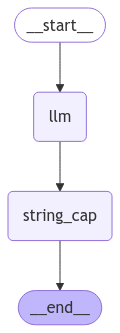

In [140]:
from IPython.display import Image, display

try:
    display(Image(graph.get_graph().draw_mermaid_png()))
except Exception:
    # This requires some extra dependencies and is optional
    pass

In [141]:
graph.invoke("Virat Kohli DOB?")



> Entering new AgentExecutor chain...
Thought: I need to find the date of birth of Virat Kohli, an Indian cricketer.

Action: wikipedia
Action Input: Virat Kohli
Observation: Page: Virat Kohli
Summary: Virat Kohli (Hindi pronunciation: [ʋɪˈɾɑːʈ ˈkoːɦli] ; born 5 November 1988) is an Indian international cricketer who plays Test and ODI cricket for the Indian national team. A former captain in all formats of the game, Kohli retired from the T20I format following India's win at the 2024 T20 World Cup. He's a right-handed batsman and an occasional unorthodox right arm quick bowler. Kohli holds the highest IPL run-scorer record, ranks third in T20I, third in ODI, and stands the fourth-highest in international cricket. Regarded as one of the greatest batsmen of all time, he also holds the record for scoring the most centuries in ODI cricket and is second in the list of most international centuries scored in international cricket.
Kohli was a member of the Indian team that won the 2008 Und

"Virat kohli's date of birth is 5 november 1988."

## **Enhancing the Chatbot with Tools**

In [149]:
from langchain_community.tools import DuckDuckGoSearchResults

tools = DuckDuckGoSearchResults()

tools.invoke("Who is the Prime Minister of Pakistan?")

"snippet: Lawmakers in Pakistan's National Assembly have elected Shehbaz Sharif for a comeback term as prime minister. He held the office from April 2022 to August 2023, and is the younger brother of three-time premier Nawaz Sharif., title: Shehbaz Sharif has been elected as Pakistan's new prime minister | AP News, link: https://apnews.com/article/pakistan-prime-minister-shehbaz-sharif-imran-khan-a6c17eacd7fc17026c41bc2d6bab97c0, snippet: Mian Muhammad Shehbaz Sharif [a] (born 23 September 1951) is a Pakistani politician and businessman who has served as the prime minister of Pakistan since March 2024, having previously served as the prime minister from April 2022 to August 2023., title: Shehbaz Sharif - Wikipedia, link: https://en.wikipedia.org/wiki/Shehbaz_Sharif, snippet: Islamabad, Pakistan - Pakistani legislators have elected Shehbaz Sharif as the country's prime minister for a second term following a controversial election last month.. The South Asian ..., title: Shehbaz Sharif e

In [197]:
from typing import Annotated
from typing_extensions import TypedDict
from langgraph.graph import StateGraph, START, END
from langgraph.graph.message import add_messages

In [207]:
class State(TypedDict):
    messages: Annotated[list, add_messages]

graph_builder = StateGraph(State)

In [209]:
# Modification: tell the LLM which tools it can call
llm_with_tools = llm.bind_tools([tools])

In [210]:
llm_with_tools

RunnableBinding(bound=ChatGroq(client=<groq.resources.chat.completions.Completions object at 0x7ea9982ba290>, async_client=<groq.resources.chat.completions.AsyncCompletions object at 0x7ea9982b8340>, model_name='llama3-70b-8192', model_kwargs={}, groq_api_key=SecretStr('**********')), kwargs={'tools': [{'type': 'function', 'function': {'name': 'duckduckgo_results_json', 'description': 'A wrapper around Duck Duck Go Search. Useful for when you need to answer questions about current events. Input should be a search query.', 'parameters': {'properties': {'query': {'description': 'search query to look up', 'type': 'string'}}, 'required': ['query'], 'type': 'object'}}}]}, config={}, config_factories=[])

In [211]:
from typing import Annotated
from langchain_core.messages import BaseMessage
from typing_extensions import TypedDict

from langgraph.graph import StateGraph
from langgraph.graph.message import add_messages
from langgraph.prebuilt import ToolNode, tools_condition


In [212]:
def chatbot(state: State):
    return {"messages": [llm_with_tools.invoke(state["messages"])]}


graph_builder.add_node("chatbot", chatbot)

In [213]:
tool_node = ToolNode(tools=[tools])
graph_builder.add_node("tools", tool_node)

graph_builder.add_conditional_edges(
    "chatbot",
    tools_condition,
)
# Any time a tool is called, we return to the chatbot to decide the next step
graph_builder.add_edge("tools", "chatbot")
graph_builder.set_entry_point("chatbot")
graph = graph_builder.compile()

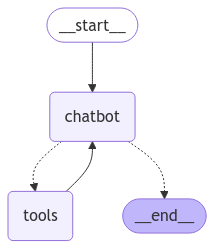

In [214]:
from IPython.display import Image, display

try:
    display(Image(graph.get_graph().draw_mermaid_png()))
except Exception:
    # This requires some extra dependencies and is optional
    pass

In [215]:
graph.invoke({"messages":"Virat Kohli DOB?"})

{'messages': [HumanMessage(content='Virat Kohli DOB?', additional_kwargs={}, response_metadata={}, id='deecfada-d0ea-45b4-9cf8-6657e6d0433e'),
  AIMessage(content='', additional_kwargs={'tool_calls': [{'id': 'call_6gm3', 'function': {'arguments': '{"query":"Virat Kohli DOB"}', 'name': 'duckduckgo_results_json'}, 'type': 'function'}]}, response_metadata={'token_usage': {'completion_tokens': 51, 'prompt_tokens': 940, 'total_tokens': 991, 'completion_time': 0.150097861, 'prompt_time': 0.058066242, 'queue_time': 0.030250317000000006, 'total_time': 0.208164103}, 'model_name': 'llama3-70b-8192', 'system_fingerprint': 'fp_753a4aecf6', 'finish_reason': 'tool_calls', 'logprobs': None}, id='run-029b4c8a-297a-49c6-94a5-241c1ec68269-0', tool_calls=[{'name': 'duckduckgo_results_json', 'args': {'query': 'Virat Kohli DOB'}, 'id': 'call_6gm3', 'type': 'tool_call'}], usage_metadata={'input_tokens': 940, 'output_tokens': 51, 'total_tokens': 991}),
  ToolMessage(content="snippet: Learn about Virat Kohli,

### Function wise

In [226]:
from langchain_community.tools import DuckDuckGoSearchResults
tools = DuckDuckGoSearchResults()

In [227]:
def llm_response(state: State):
  llm = ChatGroq(model="llama3-70b-8192", api_key=api_key)

  # Modification: tell the LLM which tools it can call
  llm_with_tools = llm.bind_tools([tools])

  return {"messages": [llm_with_tools.invoke(state["messages"])]}

In [228]:
class State(TypedDict):
    messages: Annotated[list, add_messages]

graph_builder = StateGraph(State)

In [229]:
graph_builder.add_node("llm", llm_response)

In [230]:
tool_node = ToolNode(tools=[tools])
graph_builder.add_node("tools", tool_node)

graph_builder.add_conditional_edges(
    "llm",
    tools_condition,
)
# Any time a tool is called, we return to the chatbot to decide the next step
graph_builder.add_edge("tools", "llm")
graph_builder.set_entry_point("llm")
graph = graph_builder.compile()

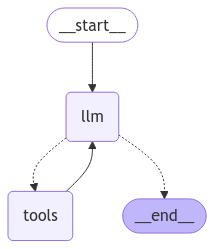

In [231]:
from IPython.display import Image, display

try:
    display(Image(graph.get_graph().draw_mermaid_png()))
except Exception:
    # This requires some extra dependencies and is optional
    pass

In [248]:
res = graph.invoke({"messages":"Imran Khan DOB?"})
res

{'messages': [HumanMessage(content='Imran Khan DOB?', additional_kwargs={}, response_metadata={}, id='1f77bde6-935c-492a-af22-6b485f63b0bf'),
  AIMessage(content='', additional_kwargs={'tool_calls': [{'id': 'call_3ys9', 'function': {'arguments': '{"query":"Imran Khan date of birth"}', 'name': 'duckduckgo_results_json'}, 'type': 'function'}]}, response_metadata={'token_usage': {'completion_tokens': 51, 'prompt_tokens': 939, 'total_tokens': 990, 'completion_time': 0.146057819, 'prompt_time': 0.046871982, 'queue_time': 0.016689886999999994, 'total_time': 0.192929801}, 'model_name': 'llama3-70b-8192', 'system_fingerprint': 'fp_2f30b0b571', 'finish_reason': 'tool_calls', 'logprobs': None}, id='run-6b8c999a-e42b-4d18-b3df-e9686e58db74-0', tool_calls=[{'name': 'duckduckgo_results_json', 'args': {'query': 'Imran Khan date of birth'}, 'id': 'call_3ys9', 'type': 'tool_call'}], usage_metadata={'input_tokens': 939, 'output_tokens': 51, 'total_tokens': 990}),
  ToolMessage(content='snippet: Imran K

In [249]:
def get_final_answer(res):
  return res['messages'][-1].content

In [250]:
get_final_answer(res)

'Imran Khan was born on October 5, 1952.'